In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorboard as tb
import tensorflow as tf 

from tensorflow.python.summary.summary_iterator import summary_iterator
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
baseline = "1024-baseline-ce-"
approx_f1 = "1024-approx-f1-regular-"

# imbalanced data 
baseline_imb = "1024-baseline-imb-"
approx_f1_imb = "1024-approx-f1-imb-"

# new approx 
new_approx = "1024-approx-f1-regular-wt-"

In [5]:
# Test tags 
test_tags = ['test/accuracy', 'test/micro-f1', 'test/macro-f1', 'test/w-f1']
for i in range(10):
    f1 = "test/class-" + str(i) + "-f1"
    precision = "test/class-" + str(i) + "-precision"
    recall = "test/class-" + str(i) + "-recall"
    tp = "test/class-" + str(i) + "-TP"
    fp = "test/class-" + str(i) + "-FP"
    fn = "test/class-" + str(i) + "-FN"
    tn = "test/class-" + str(i) + "-TN"
    test_tags.extend([f1, precision, recall, tp, fp, fn, tn])

In [6]:
train_tags = ['loss', 'train/accuracy', 'train/w-f1', 'train/micro-f1', 'train/macro-f1', 'train/w-recall'\
             'train/micro-recall', 'train/macro-recall', 'train/w-precision', 'train/micro-precision', \
             'train/macro-precision']
for i in range(10): 
    f1 = "train/class-" + str(i) + "-f1"
    precision = "train/class-"+ str(i) + "-precision"
    recall = "train/class-" + str(i) + "-recall"
    
    # softset metrics while training 
    sstp = "train/class" + str(i) + "-softset-" + "TP"
    ssfp = "train/class" + str(i) + "-softset-" + "FP"
    ssfn = "train/class" + str(i) + "-softset-" + "FN"
    sstn = "train/class" + str(i) + "-softset-" + "TN"
    
    train_tags.extend([f1, precision, recall, sstp, ssfp, ssfn, sstn])

In [8]:
baseline_valid_tags = ['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1']
for i in range(10): 
    f1 = "val/class-" + str(i) + "-f1"
    precision = "val/class-" + str(i) + "-precision"
    recall = "val/class-" + str(i) + "-recall"
    tp = "val/class-" + str(i) + "-TP"
    fp = "val/class-" + str(i) + "-FP"
    fn = "val/class-" + str(i) + "-FN"
    tn = "val/class-" + str(i) + "-TN"
    
    baseline_valid_tags.extend([f1, precision, recall, tp, fp, fn, tn, sstp, ssfp, ssfn, sstn])

In [9]:
valid_tags = ['val/accuracy', 'val/micro-f1', 'val/macro-f1', 'val/w-f1']
for i in range(10): 
    f1 = "val/class-" + str(i) + "-f1"
    precision = "val/class-" + str(i) + "-precision"
    recall = "val/class-" + str(i) + "-recall"
    tp = "val/class-" + str(i) + "-TP"
    fp = "val/class-" + str(i) + "-FP"
    fn = "val/class-" + str(i) + "-FN"
    tn = "val/class-" + str(i) + "-TN"
    
    # softset metrics while validating 
    sstp = "val/class" + str(i) + "-softset-" + "TP"
    ssfp = "val/class" + str(i) + "-softset-" + "FP"
    ssfn = "val/class" + str(i) + "-softset-" + "FN"
    sstn = "val/class" + str(i) + "-softset-" + "TN"
    valid_tags.extend([f1, precision, recall, tp, fp, fn, tn, sstp, ssfp, ssfn, sstn])

# reading in / writing results to df's

In [10]:
from tbparser.summary_reader import SummaryReader

In [11]:
baseline_results = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar_runs/1024-baseline-ce-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=baseline_valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-ce-"+str(i), "validation"]
        baseline_results.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-ce-"+str(i), "train"]
        baseline_results.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-ce-"+str(i), "test"]
        baseline_results.append(datapoint)
    print("saved for class {}...".format(str(i)))
baseline_df = pd.DataFrame(baseline_results, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(baseline_df.head())

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
              tag  epoch     value            run_name       stage
0    val/accuracy      0  0.084800  1024-baseline-ce-0  validation
1    val/micro-f1      0  0.084800  1024-baseline-ce-0  validation
2    val/macro-f1      0  0.039067  1024-baseline-ce-0  validation
3        val/w-f1      0  0.039435  1024-baseline-ce-0  validation
4  val/class-0-f1      0  0.108503  1024-baseline-ce-0  validation


In [13]:
baseline_imb_results = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar_runs/1024-baseline-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=baseline_valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-imb-"+str(i), "validation"]
        baseline_imb_results.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-imb-"+str(i), "train"]
        baseline_imb_results.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "1024-baseline-imb-"+str(i), "test"]
        baseline_imb_results.append(datapoint)
    print("saved for class {}...".format(str(i)))
baseline_imb_df = pd.DataFrame(baseline_imb_results, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(baseline_imb_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value             run_name  \
0              val/accuracy      0     0.086000  1024-baseline-imb-0   
1              val/micro-f1      0     0.086000  1024-baseline-imb-0   
2              val/macro-f1      0     0.035099  1024-baseline-imb-0   
3                  val/w-f1      0     0.035078  1024-baseline-imb-0   
4            val/class-0-f1      0     0.000000  1024-baseline-imb-0   
...                     ...    ...          ...                  ...   
370068  test/class-9-recall    169     0.331000  1024-baseline-imb-9   
370069      test/class-9-TP    169   331.000000  1024-baseline-imb-9   
370070      test/class-9-FP    169   294.000000  1024-baseline-imb-9   
370071      test/class-9-FN    169   669.000000  1024-baseline-imb-9  

In [14]:
approx_f1_reg = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar_runs/approx-f1-regular-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "validation"]
        approx_f1_reg.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "train"]
        approx_f1_reg.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-regular-"+str(i), "test"]
        approx_f1_reg.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
approx_f1_reg_df = pd.DataFrame(approx_f1_reg, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(approx_f1_reg_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
Empty DataFrame
Columns: [tag, epoch, value, run_name, stage]
Index: []


In [14]:
approx_f1_imb = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/approx-f1-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "validation"]
        approx_f1_imb.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "train"]
        approx_f1_imb.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "approx-f1-imb-"+str(i), "test"]
        approx_f1_imb.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
approx_f1_imb_df = pd.DataFrame(approx_f1_imb, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(approx_f1_imb_df)


saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value         run_name       stage
0              val/accuracy      0     0.086000  approx-f1-imb-0  validation
1              val/micro-f1      0     0.086000  approx-f1-imb-0  validation
2              val/macro-f1      0     0.035099  approx-f1-imb-0  validation
3                  val/w-f1      0     0.035078  approx-f1-imb-0  validation
4            val/class-0-f1      0     0.000000  approx-f1-imb-0  validation
...                     ...    ...          ...              ...         ...
259386  test/class-9-recall     86     0.342000  approx-f1-imb-9        test
259387      test/class-9-TP     86   342.000000  approx-f1-imb-9        test
259388      test/class-9-FP     86   255.000000  approx-f1-imb-9        test
259389      test/cla

In [15]:
wt_approx_f1_imb = []
for i in range(10): 
    # extracting the baseline results
    logdir = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/wt-approx-f1-imb-' + str(i)
    
    # extract the validation results 
    # [tag, step, value, run_name]
    reader = SummaryReader(logdir, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "validation"]
        wt_approx_f1_imb.append(datapoint)
    
    # extract the train results 
    reader = SummaryReader(logdir, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "train"]
        wt_approx_f1_imb.append(datapoint)
        
    # extract the test results 
    reader = SummaryReader(logdir, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "wt-approx-f1-imb-"+str(i), "test"]
        wt_approx_f1_imb.append(datapoint)
    print("saved for class {}...".format(str(i)))
    
wt_approx_f1_imb_df = pd.DataFrame(wt_approx_f1_imb, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
print(wt_approx_f1_imb_df)

saved for class 0...
saved for class 1...
saved for class 2...
saved for class 3...
saved for class 4...
saved for class 5...
saved for class 6...
saved for class 7...
saved for class 8...
saved for class 9...
                        tag  epoch        value            run_name  \
0              val/accuracy      0     0.086000  wt-approx-f1-imb-0   
1              val/micro-f1      0     0.086000  wt-approx-f1-imb-0   
2              val/macro-f1      0     0.035099  wt-approx-f1-imb-0   
3                  val/w-f1      0     0.035078  wt-approx-f1-imb-0   
4            val/class-0-f1      0     0.000000  wt-approx-f1-imb-0   
...                     ...    ...          ...                 ...   
359511  test/class-9-recall     96     0.179000  wt-approx-f1-imb-9   
359512      test/class-9-TP     96   179.000000  wt-approx-f1-imb-9   
359513      test/class-9-FP     96   118.000000  wt-approx-f1-imb-9   
359514      test/class-9-FN     96   821.000000  wt-approx-f1-imb-9   
359515   

In [16]:
print(baseline_df.shape)
print(baseline_imb_df.shape)
print(approx_f1_reg_df.shape)
print(approx_f1_imb_df.shape)
print(wt_approx_f1_imb_df.shape)

(269580, 5)
(256751, 5)
(345632, 5)
(259391, 5)
(359516, 5)


In [17]:
baseline_df.head()

,tag,epoch,value,run_name,stage
0,val/accuracy,0,0.084800,baseline-ce-0,validation
1,val/micro-f1,0,0.084800,baseline-ce-0,validation
2,val/macro-f1,0,0.039067,baseline-ce-0,validation
3,val/w-f1,0,0.039435,baseline-ce-0,validation
4,val/class-0-f1,0,0.108503,baseline-ce-0,validation


need to check that for a certain tag, we have varying values (to make sure that our experiment ran normally) 

In [18]:
baseline_imb_df.loc[(baseline_imb_df['tag'] == "val/class-0-f1") & \
                    (baseline_imb_df['epoch'] == 100)]['value'].std()

0.024048824519390923

In [19]:
baseline_imb_df.loc[(baseline_imb_df['tag'] == "val/class-0-f1") & \
                    (baseline_imb_df['epoch'] == 100)]['value'].mean()

0.5133409261703491

In [20]:
baseline_df = baseline_df.sort_values(by=['tag', 'epoch'])
baseline_df = baseline_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

baseline_imb_df = baseline_imb_df.sort_values(by=['tag', 'epoch'])
baseline_imb_df = baseline_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_reg_df = approx_f1_reg_df.sort_values(by=['tag', 'epoch'])
approx_f1_reg_df = approx_f1_reg_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_imb_df = approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
approx_f1_imb_df = approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

wt_approx_f1_imb_df = wt_approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
wt_approx_f1_imb_df = wt_approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

# baseline (ce) to approx-f1 

In [21]:
def compare(baseline_df, approx_f1_reg_df, metric): 
    df = baseline_df.loc[baseline_df['tag'] == metric]
    df1 = approx_f1_reg_df.loc[approx_f1_reg_df['tag'] == metric]
    print("baseline: {}".format(df.tail(1)))
    print("approx: {}".format(df1.tail(1)))
    plt.plot('epoch', 'value', data=df, label="baseline")
    plt.plot('epoch', 'value', data=df1, label="approx-f1")
    plt.title(metric)
    plt.legend()
    plt.show()

baseline:             tag  epoch     value
26927  val/w-f1    143  0.603471
approx:             tag  epoch     value
40178  val/w-f1    176  0.590541


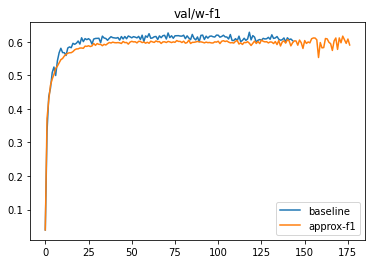

In [22]:
compare(baseline_df, approx_f1_reg_df, metric="val/w-f1")

baseline:              tag  epoch     value
10799  test/w-f1    143  0.756857
approx:              tag  epoch     value
13274  test/w-f1    176  0.681275


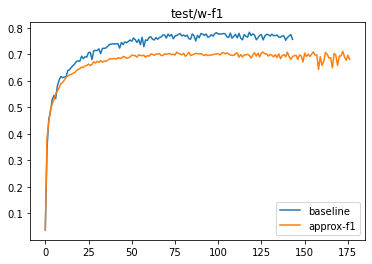

In [23]:
compare(baseline_df, approx_f1_reg_df, metric="test/w-f1")

baseline:                   tag  epoch     value
17135  val/class-0-f1    143  0.642784
approx:                   tag  epoch     value
21062  val/class-0-f1    176  0.655771


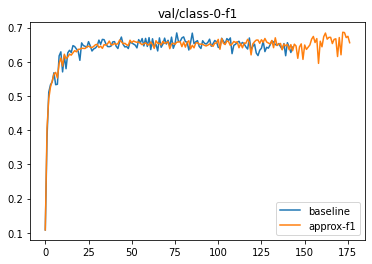

baseline:                   tag  epoch     value
18143  val/class-1-f1    143  0.710498
approx:                   tag  epoch     value
23009  val/class-1-f1    176  0.659367


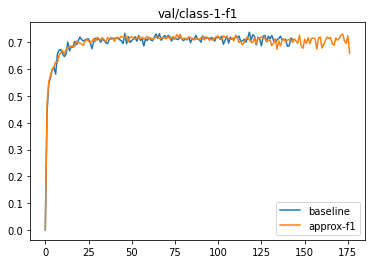

baseline:                   tag  epoch    value
19151  val/class-2-f1    143  0.49642
approx:                   tag  epoch     value
24956  val/class-2-f1    176  0.514423


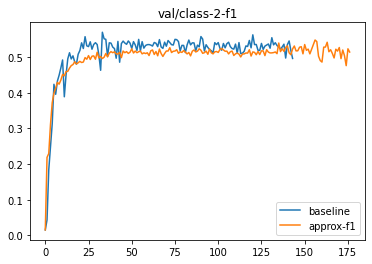

baseline:                   tag  epoch     value
20159  val/class-3-f1    143  0.403255
approx:                   tag  epoch    value
26903  val/class-3-f1    176  0.36773


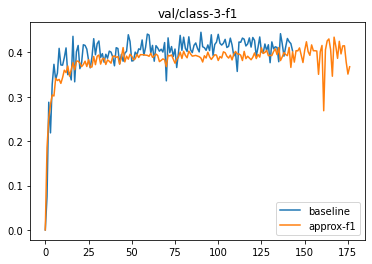

baseline:                   tag  epoch     value
21167  val/class-4-f1    143  0.565445
approx:                   tag  epoch     value
28850  val/class-4-f1    176  0.581105


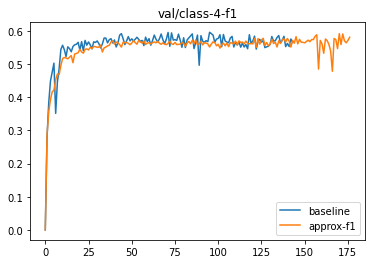

baseline:                   tag  epoch     value
22175  val/class-5-f1    143  0.496927
approx:                   tag  epoch     value
30797  val/class-5-f1    176  0.476935


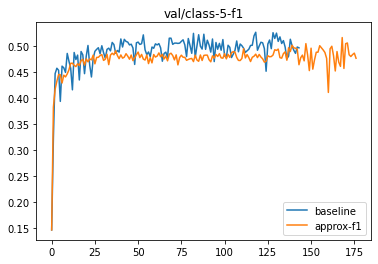

baseline:                   tag  epoch    value
23183  val/class-6-f1    143  0.64523
approx:                   tag  epoch     value
32744  val/class-6-f1    176  0.647799


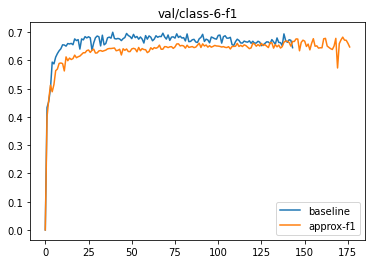

baseline:                   tag  epoch     value
24191  val/class-7-f1    143  0.624463
approx:                   tag  epoch     value
34691  val/class-7-f1    176  0.619429


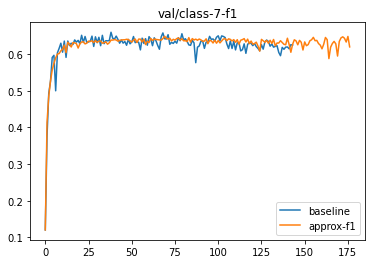

baseline:                   tag  epoch     value
25199  val/class-8-f1    143  0.743075
approx:                   tag  epoch     value
36638  val/class-8-f1    176  0.732653


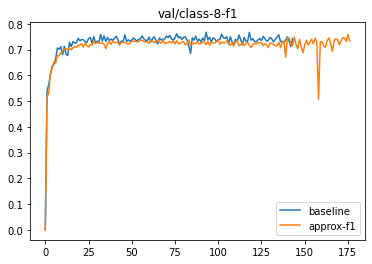

baseline:                   tag  epoch     value
26207  val/class-9-f1    143  0.709265
approx:                   tag  epoch     value
38585  val/class-9-f1    176  0.648946


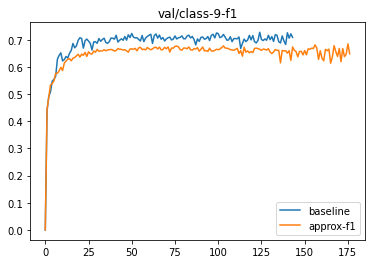

In [24]:
for i in range(10): 
    metric = "val/class-" + str(i) + "-f1"
    compare(baseline_df, approx_f1_reg_df, metric=metric)

# imbalanced: baseline vs. approx-f1 

baseline: Empty DataFrame
Columns: [tag, epoch, value]
Index: []
approx:                           tag  epoch     value
27103  val/class-9-softset-TP    120  8.948213


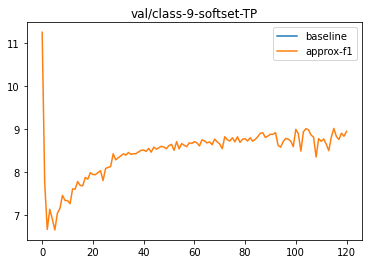

baseline: Empty DataFrame
Columns: [tag, epoch, value]
Index: []
approx:                           tag  epoch     value
26861  val/class-9-softset-FP    120  2.627845


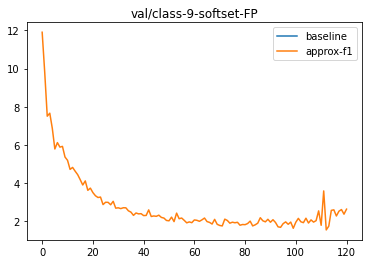

baseline: Empty DataFrame
Columns: [tag, epoch, value]
Index: []
approx:                           tag  epoch       value
26982  val/class-9-softset-TN    120  111.301739


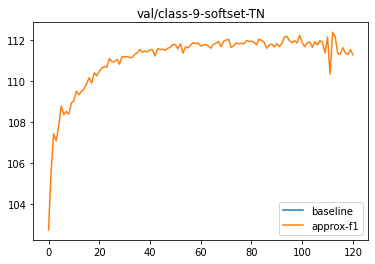

baseline: Empty DataFrame
Columns: [tag, epoch, value]
Index: []
approx:                           tag  epoch     value
26740  val/class-9-softset-FN    120  3.665089


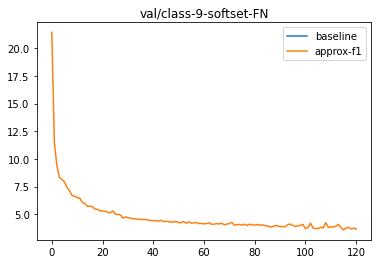

In [40]:
for x in ["TP", "FP", "TN", "FN"]:
    metric = "val/class-" + str(9) + "-softset-{}".format(x) 
    compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

baseline: Empty DataFrame
Columns: [tag, epoch, value]
Index: []
approx:                           tag  epoch     value
24441  val/class-7-softset-TP    120  7.218044


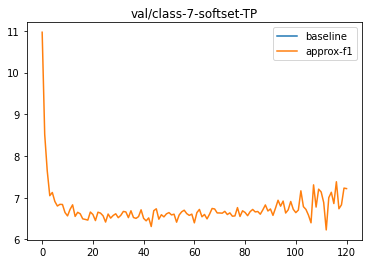

In [38]:
metric = "val/class-" + str(7) + "-softset-TP" 
compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

## class-wise f1 scores 

baseline:                     tag  epoch     value
13243  train/class-0-f1    171  0.691823
approx:                    tag  epoch     value
9316  train/class-0-f1    120  0.648638


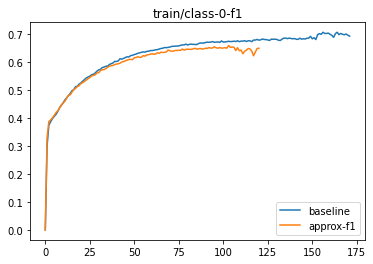

baseline:                     tag  epoch     value
13759  train/class-1-f1    171  0.749878
approx:                    tag  epoch     value
9679  train/class-1-f1    120  0.725338


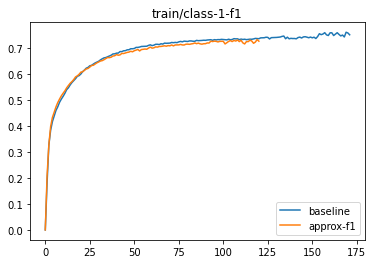

baseline:                     tag  epoch     value
14275  train/class-2-f1    171  0.540647
approx:                     tag  epoch     value
10042  train/class-2-f1    120  0.536154


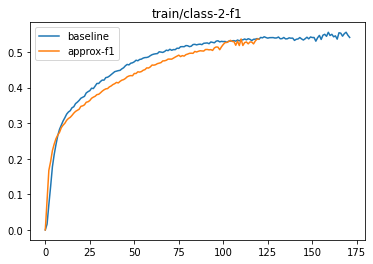

baseline:                     tag  epoch     value
14791  train/class-3-f1    171  0.556607
approx:                     tag  epoch     value
10405  train/class-3-f1    120  0.508365


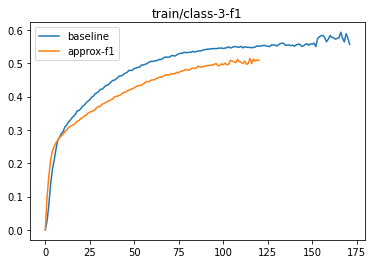

baseline:                     tag  epoch     value
15307  train/class-4-f1    171  0.584485
approx:                     tag  epoch     value
10768  train/class-4-f1    120  0.536736


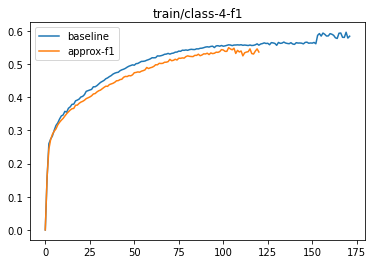

baseline:                     tag  epoch    value
15823  train/class-5-f1    171  0.60617
approx:                     tag  epoch     value
11131  train/class-5-f1    120  0.572551


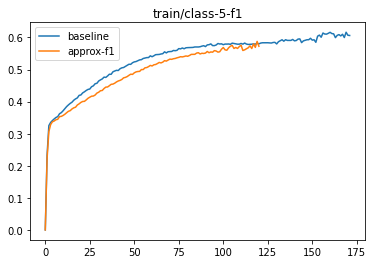

baseline:                     tag  epoch     value
16339  train/class-6-f1    171  0.667358
approx:                     tag  epoch     value
11494  train/class-6-f1    120  0.629212


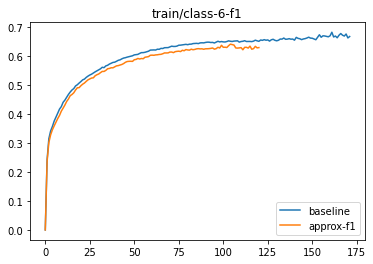

baseline:                     tag  epoch     value
16855  train/class-7-f1    171  0.670218
approx:                     tag  epoch     value
11857  train/class-7-f1    120  0.632592


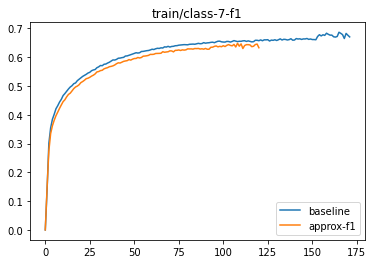

baseline:                     tag  epoch     value
17371  train/class-8-f1    171  0.744608
approx:                     tag  epoch     value
12220  train/class-8-f1    120  0.705048


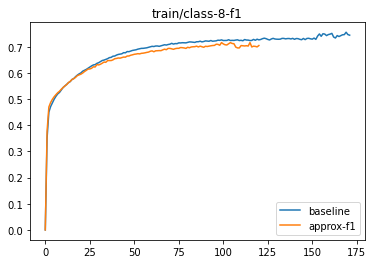

baseline:                     tag  epoch     value
17887  train/class-9-f1    171  0.816135
approx:                     tag  epoch     value
12583  train/class-9-f1    120  0.786463


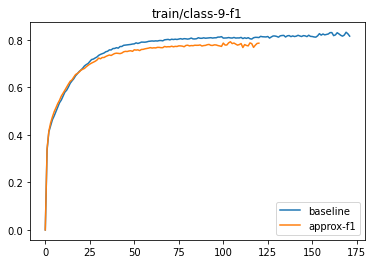

In [34]:
for i in range(10): 
    metric = "train/class-" + str(i) + "-f1"
    compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

baseline:                   tag  epoch     value
1203  test/class-0-f1    171  0.497795
approx:                  tag  epoch     value
846  test/class-0-f1    120  0.505407


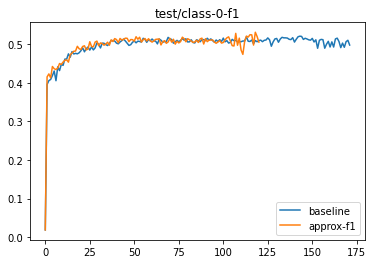

baseline:                   tag  epoch     value
2407  test/class-1-f1    171  0.533968
approx:                   tag  epoch     value
1693  test/class-1-f1    120  0.528155


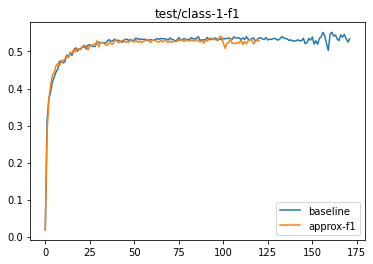

baseline:                   tag  epoch     value
3611  test/class-2-f1    171  0.319817
approx:                   tag  epoch     value
2540  test/class-2-f1    120  0.325027


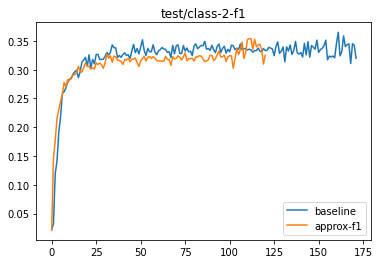

baseline:                   tag  epoch     value
4815  test/class-3-f1    171  0.293128
approx:                   tag  epoch    value
3387  test/class-3-f1    120  0.28844


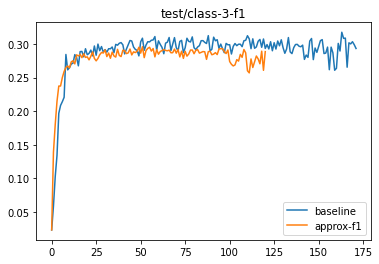

baseline:                   tag  epoch     value
6019  test/class-4-f1    171  0.393064
approx:                   tag  epoch     value
4234  test/class-4-f1    120  0.357789


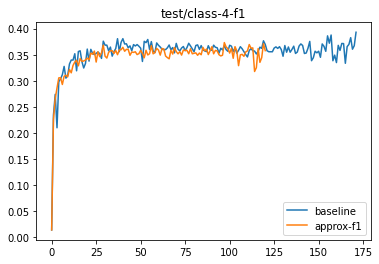

baseline:                   tag  epoch     value
7223  test/class-5-f1    171  0.359511
approx:                   tag  epoch     value
5081  test/class-5-f1    120  0.347483


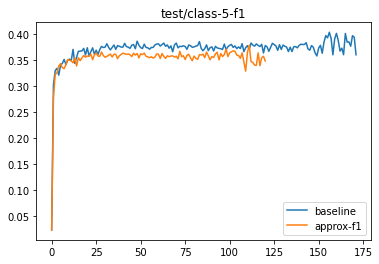

baseline:                   tag  epoch     value
8427  test/class-6-f1    171  0.473837
approx:                   tag  epoch     value
5928  test/class-6-f1    120  0.469443


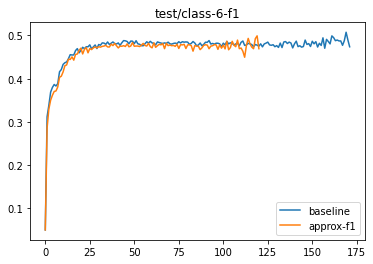

baseline:                   tag  epoch  value
9631  test/class-7-f1    171  0.475
approx:                   tag  epoch     value
6775  test/class-7-f1    120  0.524557


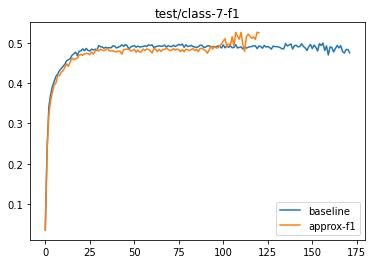

baseline:                    tag  epoch     value
10835  test/class-8-f1    171  0.552964
approx:                   tag  epoch     value
7622  test/class-8-f1    120  0.577193


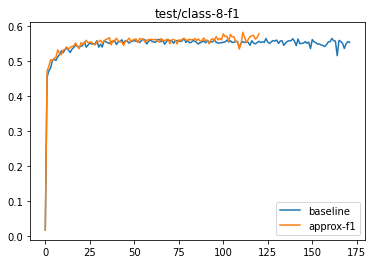

baseline:                    tag  epoch   value
12039  test/class-9-f1    171  0.3607
approx:                   tag  epoch     value
8469  test/class-9-f1    120  0.404762


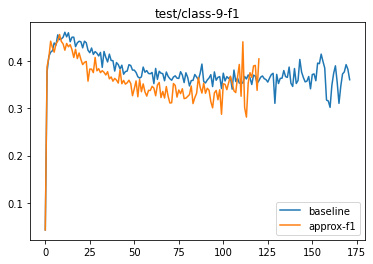

In [25]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-f1"
    compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

## class-wise precision scores 

baseline:                          tag  epoch     value
1375  test/class-0-precision    171  0.487992
approx:                         tag  epoch     value
967  test/class-0-precision    120  0.586526


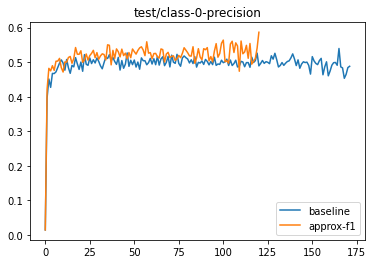

baseline:                          tag  epoch     value
2579  test/class-1-precision    171  0.470633
approx:                          tag  epoch     value
1814  test/class-1-precision    120  0.513208


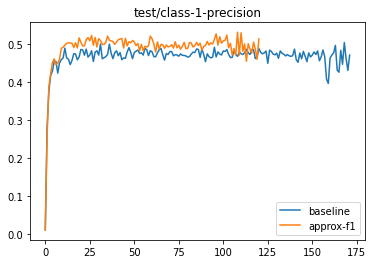

baseline:                          tag  epoch     value
3783  test/class-2-precision    171  0.372836
approx:                          tag  epoch    value
2661  test/class-2-precision    120  0.35461


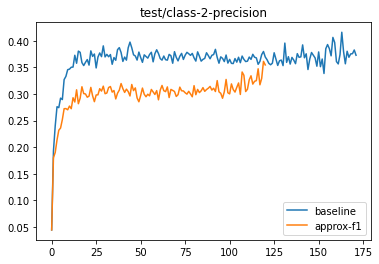

baseline:                          tag  epoch     value
4987  test/class-3-precision    171  0.282146
approx:                          tag  epoch     value
3508  test/class-3-precision    120  0.233189


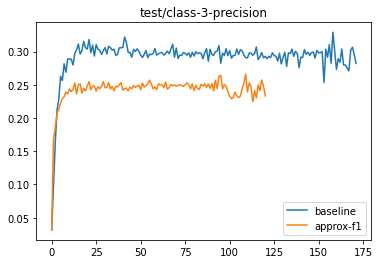

baseline:                          tag  epoch     value
6191  test/class-4-precision    171  0.353883
approx:                          tag  epoch     value
4355  test/class-4-precision    120  0.359596


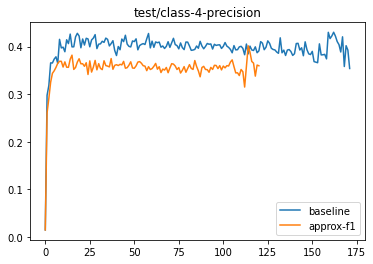

baseline:                          tag  epoch     value
7395  test/class-5-precision    171  0.429764
approx:                          tag  epoch    value
5202  test/class-5-precision    120  0.34308


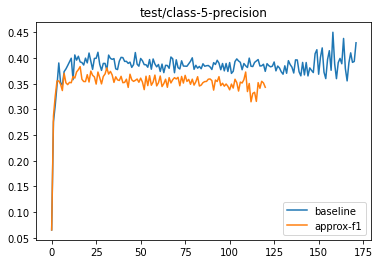

baseline:                          tag  epoch     value
8599  test/class-6-precision    171  0.459586
approx:                          tag  epoch    value
6049  test/class-6-precision    120  0.51119


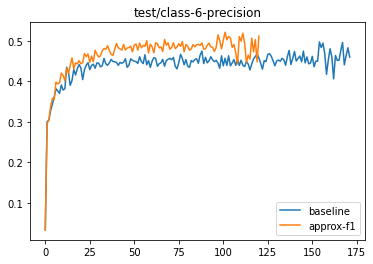

baseline:                          tag  epoch     value
9803  test/class-7-precision    171  0.429032
approx:                          tag  epoch     value
6896  test/class-7-precision    120  0.531282


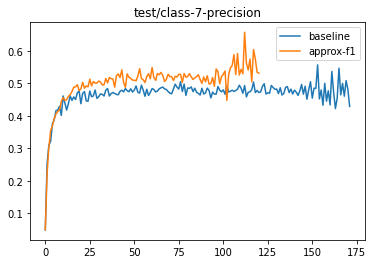

baseline:                           tag  epoch     value
11007  test/class-8-precision    171  0.537807
approx:                          tag  epoch     value
7743  test/class-8-precision    120  0.514063


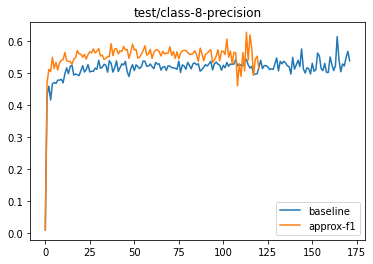

baseline:                           tag  epoch    value
12211  test/class-9-precision    171  0.55144
approx:                          tag  epoch     value
8590  test/class-9-precision    120  0.541946


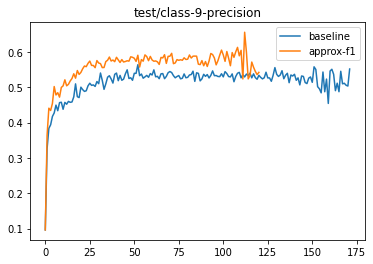

In [26]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-precision"
    compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

## class-wise recall scores 

baseline:                       tag  epoch  value
1547  test/class-0-recall    171  0.508
approx:                       tag  epoch  value
1088  test/class-0-recall    120  0.444


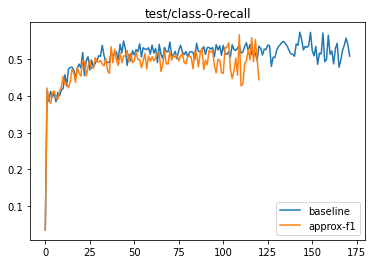

baseline:                       tag  epoch  value
2751  test/class-1-recall    171  0.617
approx:                       tag  epoch  value
1935  test/class-1-recall    120  0.544


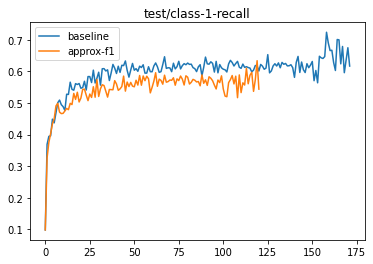

baseline:                       tag  epoch  value
3955  test/class-2-recall    171   0.28
approx:                       tag  epoch  value
2782  test/class-2-recall    120    0.3


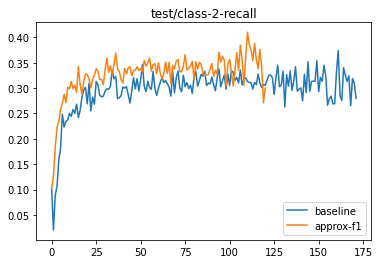

baseline:                       tag  epoch  value
5159  test/class-3-recall    171  0.305
approx:                       tag  epoch  value
3629  test/class-3-recall    120  0.378


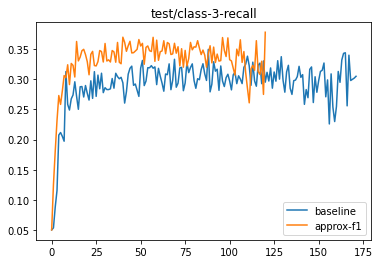

baseline:                       tag  epoch  value
6363  test/class-4-recall    171  0.442
approx:                       tag  epoch  value
4476  test/class-4-recall    120  0.356


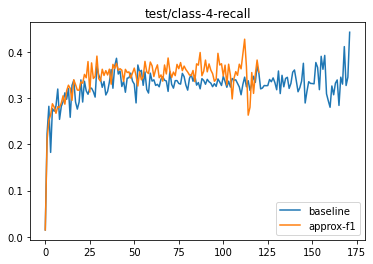

baseline:                       tag  epoch  value
7567  test/class-5-recall    171  0.309
approx:                       tag  epoch  value
5323  test/class-5-recall    120  0.352


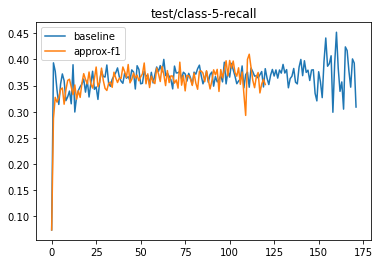

baseline:                       tag  epoch  value
8771  test/class-6-recall    171  0.489
approx:                       tag  epoch  value
6170  test/class-6-recall    120  0.434


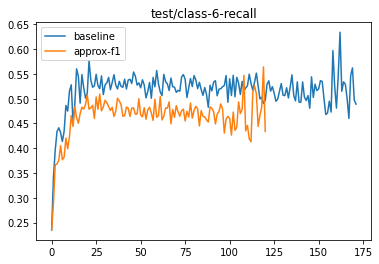

baseline:                       tag  epoch  value
9975  test/class-7-recall    171  0.532
approx:                       tag  epoch  value
7017  test/class-7-recall    120  0.518


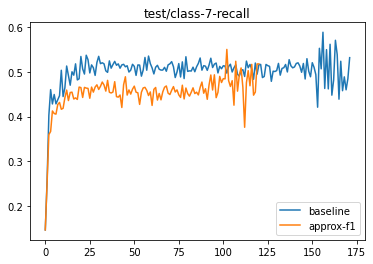

baseline:                        tag  epoch  value
11179  test/class-8-recall    171  0.569
approx:                       tag  epoch  value
7864  test/class-8-recall    120  0.658


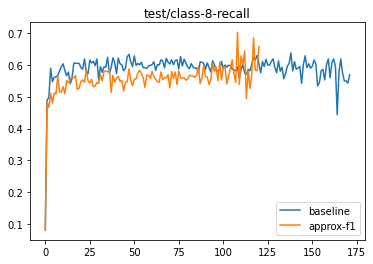

baseline:                        tag  epoch  value
12383  test/class-9-recall    171  0.268
approx:                       tag  epoch  value
8711  test/class-9-recall    120  0.323


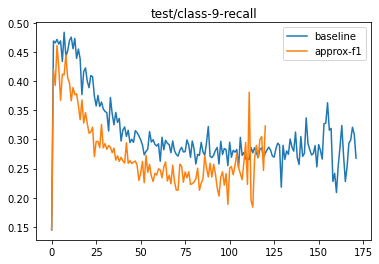

In [27]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-recall"
    compare(baseline_imb_df, approx_f1_imb_df, metric=metric)

# imbalanced: baseline vs. new approx-f1 

## class-wise f1 scores

baseline:                   tag  epoch     value
1203  test/class-0-f1    171  0.497795
approx:                   tag  epoch     value
1672  test/class-0-f1    238  0.327189


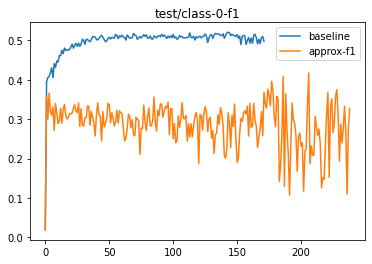

baseline:                   tag  epoch     value
2407  test/class-1-f1    171  0.533968
approx:                   tag  epoch     value
3345  test/class-1-f1    238  0.108209


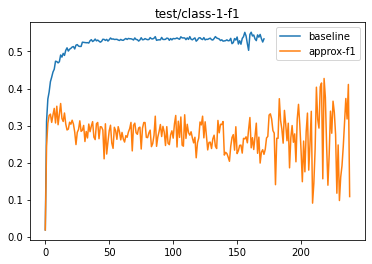

baseline:                   tag  epoch     value
3611  test/class-2-f1    171  0.319817
approx:                   tag  epoch     value
5018  test/class-2-f1    238  0.197898


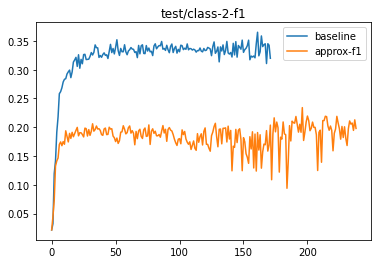

baseline:                   tag  epoch     value
4815  test/class-3-f1    171  0.293128
approx:                   tag  epoch     value
6691  test/class-3-f1    238  0.161931


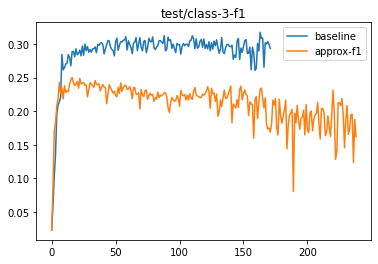

baseline:                   tag  epoch     value
6019  test/class-4-f1    171  0.393064
approx:                   tag  epoch    value
8364  test/class-4-f1    238  0.21975


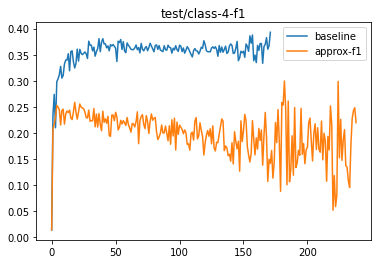

baseline:                   tag  epoch     value
7223  test/class-5-f1    171  0.359511
approx:                    tag  epoch     value
10037  test/class-5-f1    238  0.252252


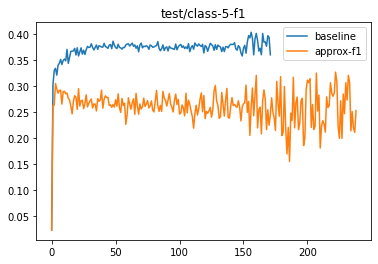

baseline:                   tag  epoch     value
8427  test/class-6-f1    171  0.473837
approx:                    tag  epoch     value
11710  test/class-6-f1    238  0.351351


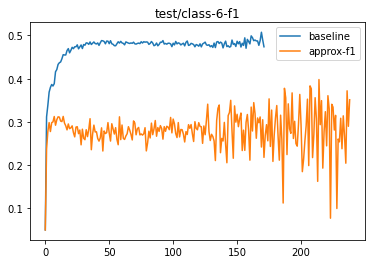

baseline:                   tag  epoch  value
9631  test/class-7-f1    171  0.475
approx:                    tag  epoch     value
13383  test/class-7-f1    238  0.263077


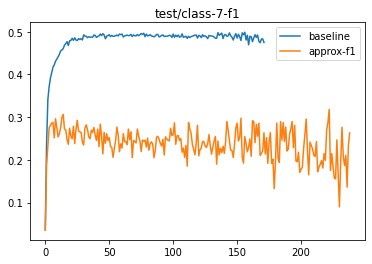

baseline:                    tag  epoch     value
10835  test/class-8-f1    171  0.552964
approx:                    tag  epoch     value
15056  test/class-8-f1    238  0.288693


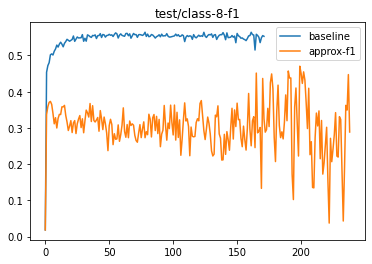

baseline:                    tag  epoch   value
12039  test/class-9-f1    171  0.3607
approx:                    tag  epoch     value
16729  test/class-9-f1    238  0.068506


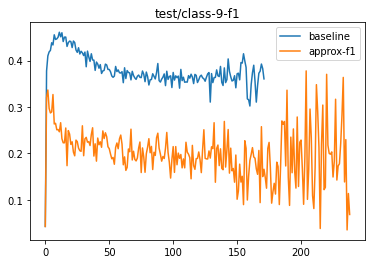

In [28]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-f1"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## class-wise precision

baseline:                          tag  epoch     value
1375  test/class-0-precision    171  0.487992
approx:                          tag  epoch     value
1911  test/class-0-precision    238  0.705298


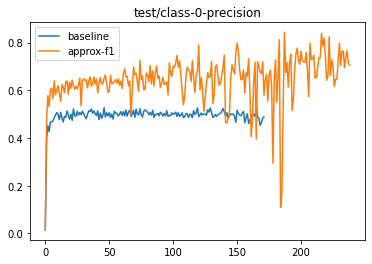

baseline:                          tag  epoch     value
2579  test/class-1-precision    171  0.470633
approx:                          tag  epoch     value
3584  test/class-1-precision    238  0.805556


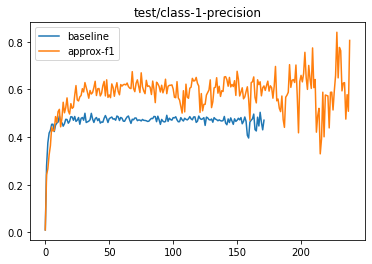

baseline:                          tag  epoch     value
3783  test/class-2-precision    171  0.372836
approx:                          tag  epoch     value
5257  test/class-2-precision    238  0.115077


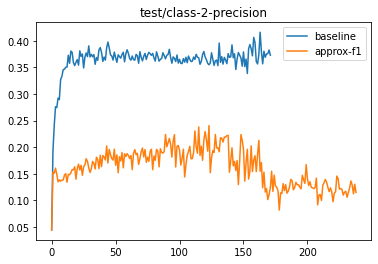

baseline:                          tag  epoch     value
4987  test/class-3-precision    171  0.282146
approx:                          tag  epoch     value
6930  test/class-3-precision    238  0.132569


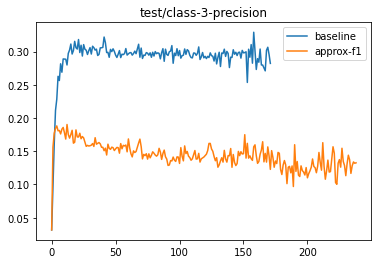

baseline:                          tag  epoch     value
6191  test/class-4-precision    171  0.353883
approx:                          tag  epoch     value
8603  test/class-4-precision    238  0.360731


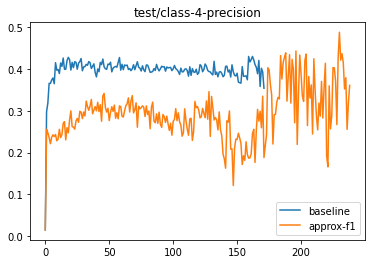

baseline:                          tag  epoch     value
7395  test/class-5-precision    171  0.429764
approx:                           tag  epoch     value
10276  test/class-5-precision    238  0.506024


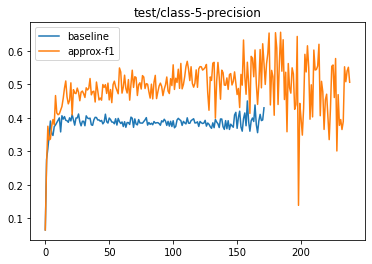

baseline:                          tag  epoch     value
8599  test/class-6-precision    171  0.459586
approx:                           tag  epoch    value
11949  test/class-6-precision    238  0.49278


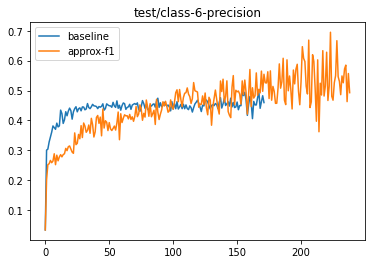

baseline:                          tag  epoch     value
9803  test/class-7-precision    171  0.429032
approx:                           tag  epoch  value
13622  test/class-7-precision    238   0.57


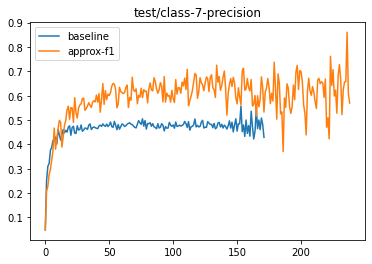

baseline:                           tag  epoch     value
11007  test/class-8-precision    171  0.537807
approx:                           tag  epoch     value
15295  test/class-8-precision    238  0.728745


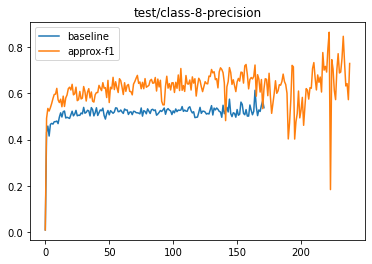

baseline:                           tag  epoch    value
12211  test/class-9-precision    171  0.55144
approx:                           tag  epoch     value
16968  test/class-9-precision    238  0.705882


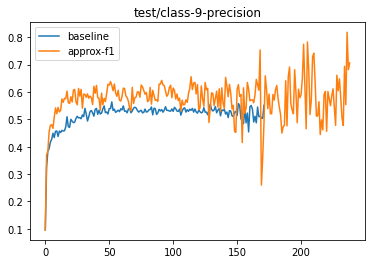

In [29]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-precision"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## class-wise recall

baseline:                       tag  epoch  value
1547  test/class-0-recall    171  0.508
approx:                       tag  epoch  value
2150  test/class-0-recall    238  0.213


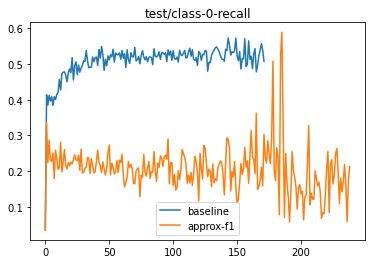

baseline:                       tag  epoch  value
2751  test/class-1-recall    171  0.617
approx:                       tag  epoch  value
3823  test/class-1-recall    238  0.058


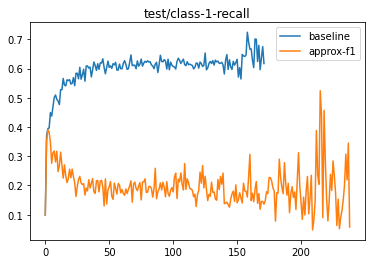

baseline:                       tag  epoch  value
3955  test/class-2-recall    171   0.28
approx:                       tag  epoch  value
5496  test/class-2-recall    238  0.706


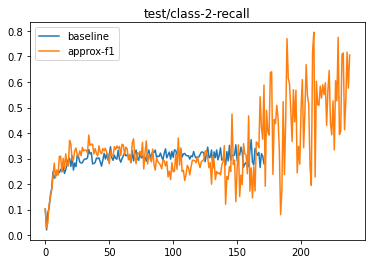

baseline:                       tag  epoch  value
5159  test/class-3-recall    171  0.305
approx:                       tag  epoch  value
7169  test/class-3-recall    238  0.208


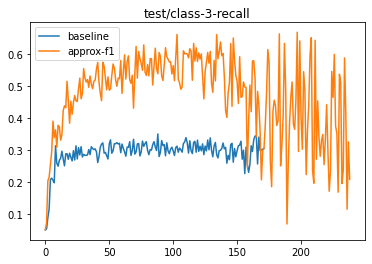

baseline:                       tag  epoch  value
6363  test/class-4-recall    171  0.442
approx:                       tag  epoch  value
8842  test/class-4-recall    238  0.158


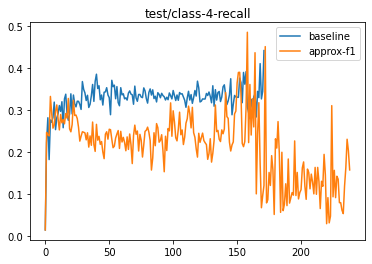

baseline:                       tag  epoch  value
7567  test/class-5-recall    171  0.309
approx:                        tag  epoch  value
10515  test/class-5-recall    238  0.168


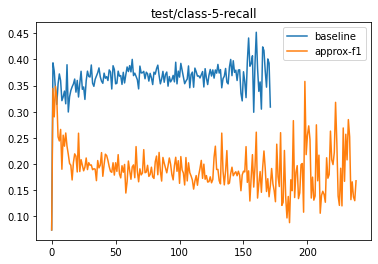

baseline:                       tag  epoch  value
8771  test/class-6-recall    171  0.489
approx:                        tag  epoch  value
12188  test/class-6-recall    238  0.273


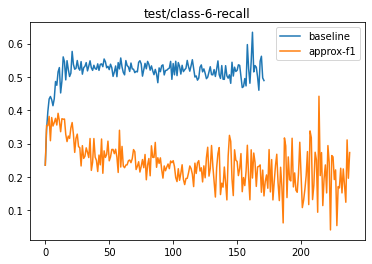

baseline:                       tag  epoch  value
9975  test/class-7-recall    171  0.532
approx:                        tag  epoch  value
13861  test/class-7-recall    238  0.171


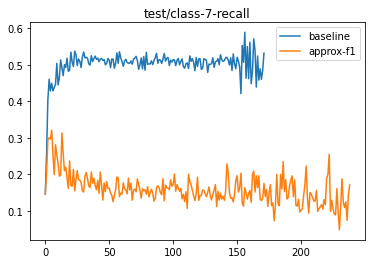

baseline:                        tag  epoch  value
11179  test/class-8-recall    171  0.569
approx:                        tag  epoch  value
15534  test/class-8-recall    238   0.18


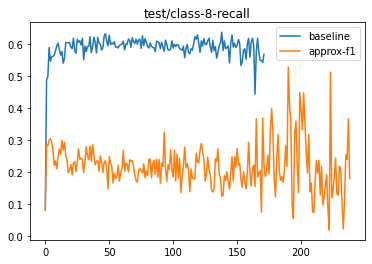

baseline:                        tag  epoch  value
12383  test/class-9-recall    171  0.268
approx:                        tag  epoch  value
17207  test/class-9-recall    238  0.036


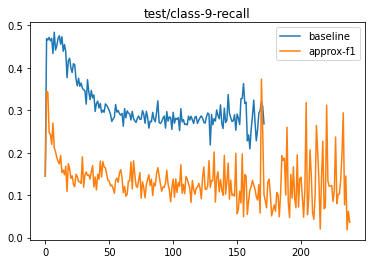

In [30]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-recall"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## how are the confusion values per class moving? 

baseline:                    tag  epoch  value
11867  test/class-9-TP    171  268.0
approx:                    tag  epoch  value
16490  test/class-9-TP    238   36.0


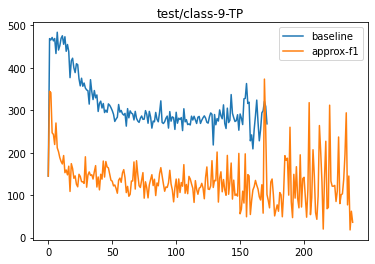

baseline:                    tag  epoch  value
11523  test/class-9-FP    171  218.0
approx:                    tag  epoch  value
16012  test/class-9-FP    238   15.0


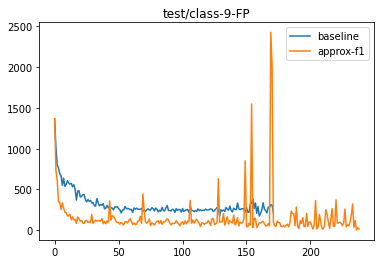

baseline:                    tag  epoch   value
11695  test/class-9-TN    171  4051.0
approx:                    tag  epoch   value
16251  test/class-9-TN    238  2135.0


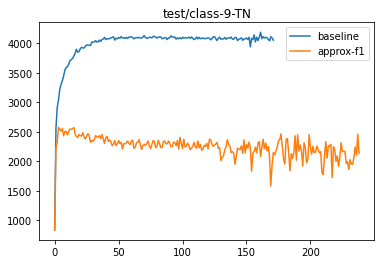

baseline:                    tag  epoch  value
11351  test/class-9-FN    171  732.0
approx:                    tag  epoch  value
15773  test/class-9-FN    238  964.0


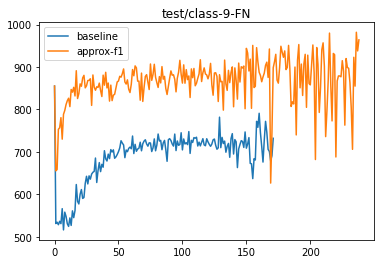

In [33]:
metric = "test/class-" + str(9) + "-TP"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-FP"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-TN"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-FN"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)